В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
medical_df = pd.read_csv('medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [2]:
non_smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from math import sqrt

In [4]:
# X = non_smoker_df['age']
# y = non_smoker_df['charges']

In [5]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta
    

In [6]:
X = non_smoker_df.age.values.reshape(-1, 1)
y = non_smoker_df['charges'].values

X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

least_squares_coefs = normal_equation(X_with_intercept, y)
intercept, slope = least_squares_coefs

print(X.shape, X_with_intercept.shape)

(1064, 1) (1064, 2)


In [7]:
MNK_coefs = normal_equation(X_with_intercept, y)
print(MNK_coefs)

[-2091.42055657   267.24891283]


In [8]:
predictions_MNK = X_with_intercept @ MNK_coefs
print(predictions_MNK)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


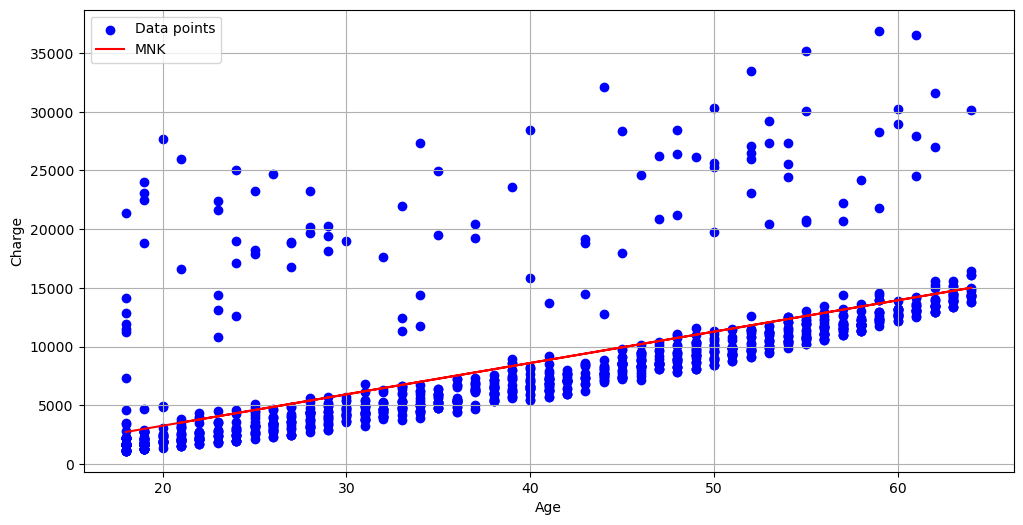

In [9]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charge')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
r2 = r2_score(y, predictions_MNK)
rmse = root_mean_squared_error(y, predictions_MNK)
mae = mean_absolute_error(y, predictions_MNK)

print(f'R2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

R2: 0.39
RMSE: 4662.51
MAE: 2580.52


**Завдання 1.2 Full-Batch**

In [14]:
def full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [15]:
lr1 = 0.0001
lr2 = 0.00005
lr3 = 0.00001

In [18]:
m1, b1, errors1 = full_batch_gradient_descent(X, y, lr=lr1, epochs=1000)
predictions_fbgd = m1 * X[:, 0] + b1
m2, b2, errors2 = full_batch_gradient_descent(X, y, lr=lr2, epochs=1000)
m3, b3, errors3 = full_batch_gradient_descent(X, y, lr=lr3, epochs=1000)
print(predictions_fbgd)

[3937.9012503  6148.94709409 7254.47001599 ... 3937.9012503  3937.9012503
 4601.21500344]


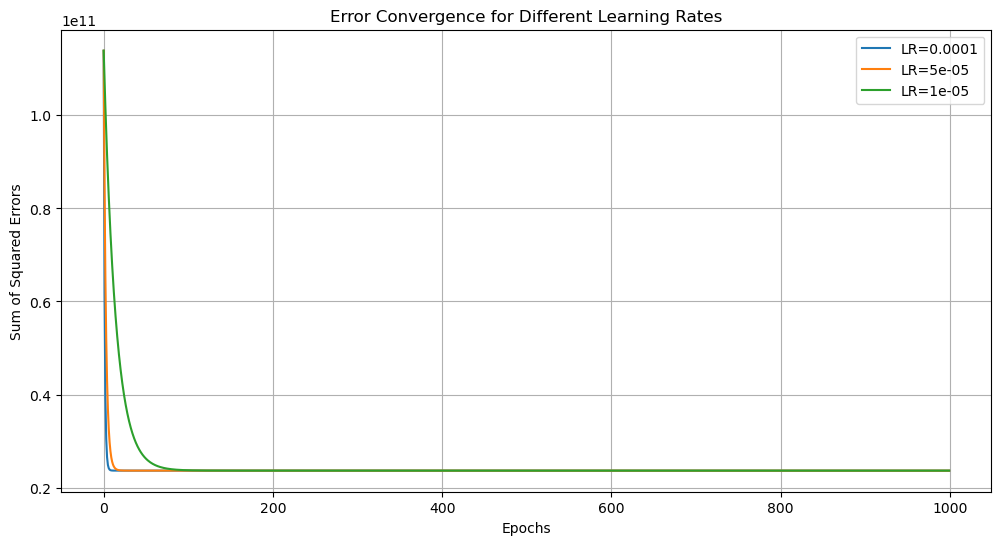

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(errors1, label=f"LR={lr1}")
plt.plot(errors2, label=f"LR={lr2}")
plt.plot(errors3, label=f"LR={lr3}")
plt.xlabel("Epochs")
plt.ylabel("Sum of Squared Errors")
plt.title("Error Convergence for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

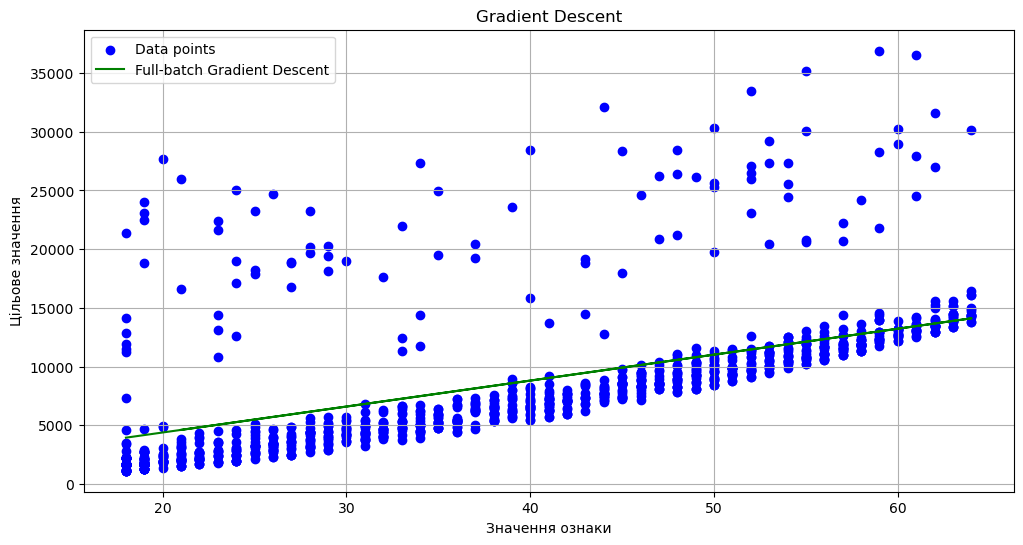

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.title('Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
r2 = r2_score(y, predictions_fbgd)
rmse = root_mean_squared_error(y, predictions_fbgd)
mae = mean_absolute_error(y, predictions_fbgd)

print(f'R2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

R2: 0.38
RMSE: 4713.25
MAE: 2803.85


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([267.24891283]), -2091.4205565650827)

In [24]:
predictions_sklearn = model.predict(X)

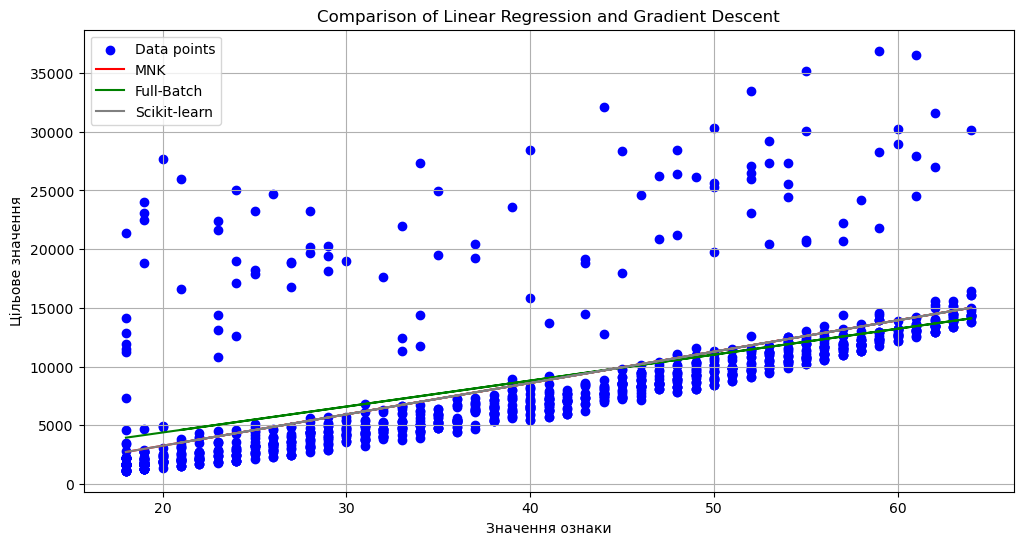

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-Batch')
plt.plot(X[:, 0], predictions_sklearn, color='gray', label='Scikit-learn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
r2 = r2_score(y, predictions_sklearn)
rmse = root_mean_squared_error(y, predictions_sklearn)
mae = mean_absolute_error(y, predictions_sklearn)

print(f'R2: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

R2: 0.39
RMSE: 4662.51
MAE: 2580.52


 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [27]:
smoker_df = medical_df[medical_df.smoker == 'yes']

smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


In [30]:
X = smoker_df[['age']]
y = smoker_df['charges']

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(model.coef_, model.intercept_)

[267.24891283] -2091.4205565650827


In [32]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = lin_reg.predict(X)

rmse = root_mean_squared_error(y, y_pred)

mae = mean_absolute_error(y, y_pred)

r2 = r2_score(y, y_pred)

print(smoker_df.charges.describe())
print(45 * '=')
print(f'Metrics for Linear Regression Model:')
print(f'  RMSE: {rmse:.2f}')
print(f'  MAE: {mae:.2f}')
print(f'  R²: {r2:.2f}')

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64
Metrics for Linear Regression Model:
  RMSE: 10711.00
  MAE: 10097.80
  R²: 0.14


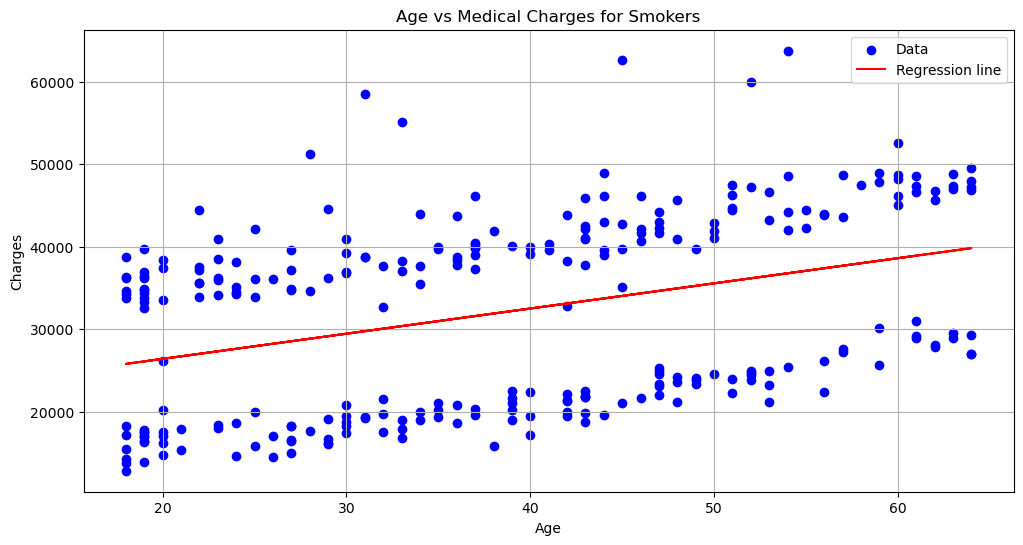

In [33]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Data', color='blue')
plt.plot(X, y_pred, label='Regression line', color='red')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Medical Charges for Smokers')
plt.legend()
plt.grid(True)
plt.show()